In [1]:
import numpy as np 

In [103]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, num_iter = 10, lr = 1e-3, bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        # parameter
        self.thetha = np.array([])
        self.lamb = 10

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])

        self.thetha = np.zeros(X.shape[1]).reshape((-1, 1))
        for i in range(self.iter):
            self._descent(X, y)

            
           

            
            


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])


        return np.where(self._hypothetical_function(X) >=0.5, 1, 0)

       

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape((-1, 1))
            X = np.hstack([a, X])
        return self._hypothetical_function(X)
    

    def _some(self, x):
        return x @ self.thetha
    
    def _hypothetical_function(self, x):
        y_pred = x @ self.thetha 
        sigmoid = 1 + np.exp(-y_pred)
        return 1/sigmoid
    
    def _descent(self, x, y):
        rows = x.shape[0]
        columns = x.shape[1]

        y_pred = self._hypothetical_function(x)

        for column in range(columns):
            gradient = np.array([])
            for row in range(rows):
                error = (y_pred[row] - y[row]) * x[row, column]
                gradient = np.append(gradient, error)
            gradient = np.average(gradient)
            
            resolve = gradient + (self.lamb* self.thetha[column])/rows
            
            self.thetha[column] = self.thetha[column] - resolve
  

In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()

features = iris.data
target = iris.target 

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [109]:
model = ScratchLogisticRegression(num_iter=1000, lr=1e-4)

model.fit(x_train, y_train)

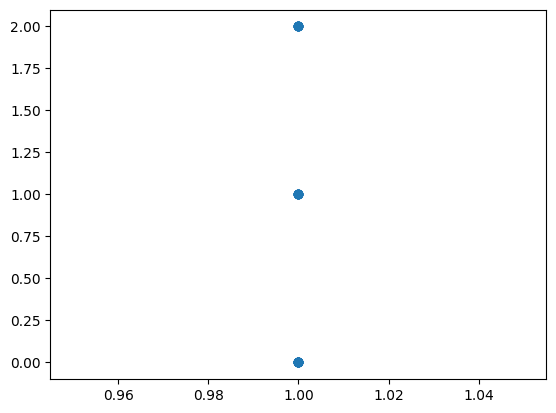

In [110]:
from matplotlib import pyplot as plt 


plt.scatter(model.predict(x_test), y_test)

In [111]:
model.predict(x_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])